## Logistic Regression

In [5]:
import numpy as np
p = 0.5
q = 1-p
print(np.log(p/q))

0.0


In [6]:
p = 0.99999
q = 1-p
print(np.log(p/q))

11.51291546492478


In [7]:
log_list = []
l1 = [.00001,.0001,.001,.01,.1,.2,.3,.4,.5,.6,.7,.99,.999,.9999,.99999,.999999]
for p in l1:
    log_list.append(np.log( p / (1-p)))

In [8]:
Sigmoid , S curve,squash function 

SyntaxError: invalid syntax (1347625624.py, line 1)

In [9]:
Accuarcy :  truepre/total pred

SyntaxError: invalid syntax (3059592727.py, line 1)

In [10]:
Accuarcy = TN+TP/(TN+TP+FP+FN)
TPR = TP/TP+FN  = sensitivity 
FPR = FP/(FP+TN)


SyntaxError: cannot assign to expression (2869693813.py, line 2)

In [11]:
Precision and Recall:  

SyntaxError: invalid syntax (2296594926.py, line 1)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn import metrics

In [14]:
colnames =['preg','plas','pres','skin','test','mass','pedi','age','class']

In [15]:
df = pd.read_csv(r"pima.csv",names = colnames)


In [16]:
df.sample(4)
# df['class'].value_counts()

preg  plas  pres  skin  test  mass   pedi  age  class
399     3   193    70    31     0  34.9  0.241   25      1
722     1   149    68    29   127  29.3  0.349   42      1
190     3   111    62     0     0  22.6  0.142   21      0
380     1   107    72    30    82  30.8  0.821   24      0

In [17]:
# check if any column has any other value other than a number,np.real,
#applymap function
# df[~df.applymap(np.isreal).all(1)]

In [18]:
#df.info()
#df.dtypes
#df.select_dtypes(include='object')


In [19]:
# df.isnull().sum()

In [20]:
# df.describe().transpose()

In [21]:
#univariate ,bivariate and multi variate analysis:
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

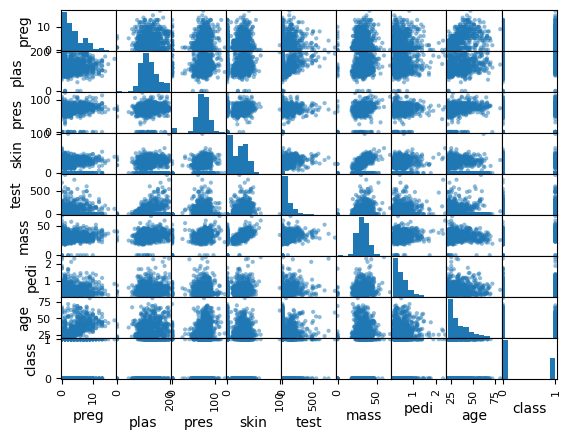

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

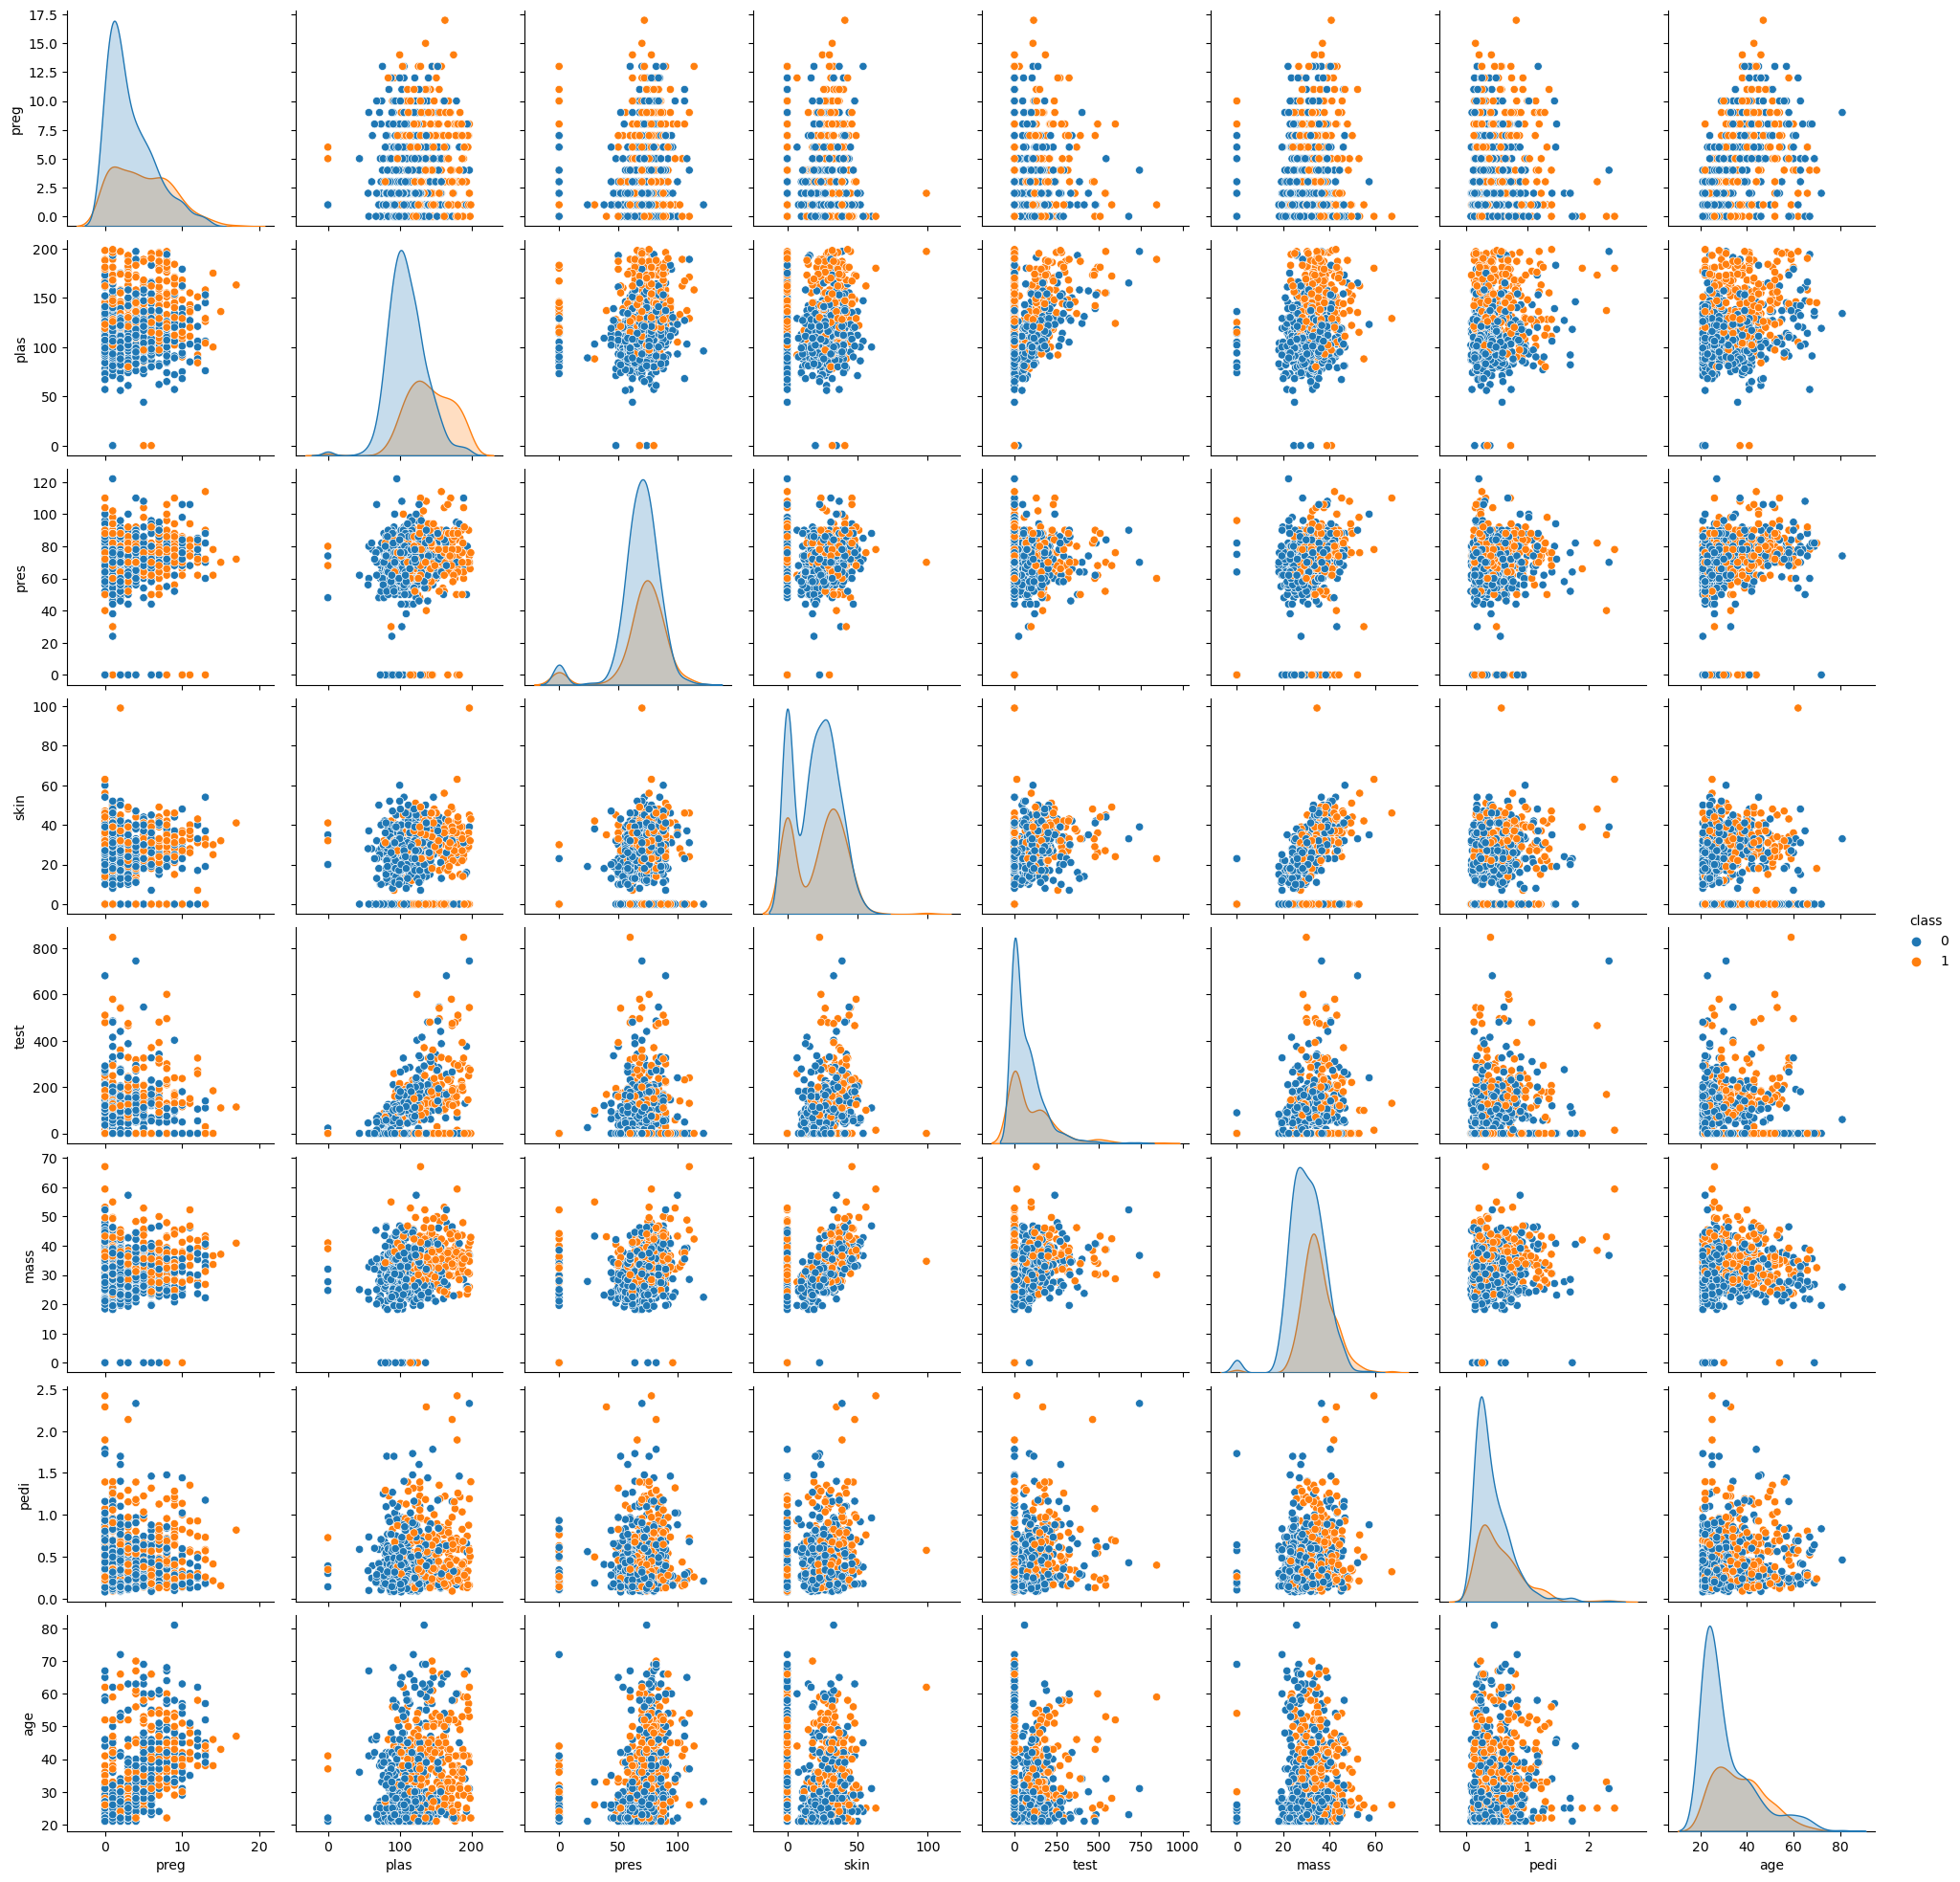

In [22]:
# correlation analysis
axes = pd.plotting.scatter_matrix(df)
plt.show()

sns.pairplot(df,diag_kind = 'kde',hue = 'class')

In [29]:
df.head(3)

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1

In [30]:
from sklearn.model_selection import train_test_split
# x = df.iloc[:,0:8]
# y = df.iloc[:,8:]  
x_train,x_test,y_train,y_test = train_test_split(df.drop('class',axis = 1),
                        df['class'],test_size = 0.3,random_state = 19)

In [31]:
# fit the model
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()

In [32]:
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_test

693    1
624    0
711    0
485    1
717    0
      ..
712    1
211    0
748    1
334    0
688    0
Name: class, Length: 231, dtype: int64

In [34]:
y_predict = model.predict(x_test)
# y_predict

In [35]:
y_test.shape

(231,)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cf = confusion_matrix(y_test,y_predict)
cf
                   

array([[139,  15],
       [ 35,  42]], dtype=int64)

In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.74      0.55      0.63        77

    accuracy                           0.78       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231



Precision:

Class 0: 0.80 — 80% of the instances predicted as class 0 are actually class 0.
Class 1: 0.71 — 71% of the instances predicted as class 1 are actually class 1.
Recall:

Class 0: 0.90 — The model correctly identifies 90% of the actual class 0 instances.
Class 1: 0.53 — The model correctly identifies 53% of the actual class 1 instances.
F1-Score:

Class 0: 0.85 — The harmonic mean of precision and recall for class 0, indicating a good balance between precision and recall.
Class 1: 0.60 — The harmonic mean of precision and recall for class 1, indicating a moderate performance due to the lower recall.
Support:

Class 0: 157 instances in the test set belong to class 0.
Class 1: 74 instances in the test set belong to class 1.
Overall Metrics:
Accuracy: 0.78 — The model correctly classifies 78% of the total instances.
Macro Average:

Precision: 0.76 — The unweighted average precision across the classes.
Recall: 0.71 — The unweighted average recall across the classes.
F1-Score: 0.73 — The unweighted average F1-score across the classes.
Macro averages are simple averages of the precision, recall, and F1-scores for each class, treating each class equally, regardless of support.
Weighted Average:

Precision: 0.77 — The average precision weighted by the number of instances in each class.
Recall: 0.78 — The average recall weighted by the number of instances in each class.
F1-Score: 0.77 — The average F1-score weighted by the number of instances in each class.
Weighted averages take into account the number of instances for each class, making them more reflective of the overall model performance, especially in imbalanced datasets.
Summary:
The model performs better for class 0, with higher precision, recall, and F1-score, compared to class 1.
Class 1 has a lower recall (0.53), meaning the model misses 47% of the actual class 1 instances, which affects the F1-score (0.60).
The overall accuracy is 78%, which indicates good performance, but the lower recall for class 1 suggests that the model could improve in identifying all instances of class 1.
The weighted averages provide a more balanced view of the model's performance, considering the class distribution, and suggest that the model performs reasonably well overall.

In [38]:
# con =confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()


In [39]:
TN = cf[0,0]
FP = cf[0,1]
FN = cf[1,0]
TP = cf[1,1]

In [40]:
# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
# tn, fp, fn, tp  

0  1       1   1        
0  1       1   0

SyntaxError: invalid syntax (2384805230.py, line 4)

In [41]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html

Precision and recall :
    
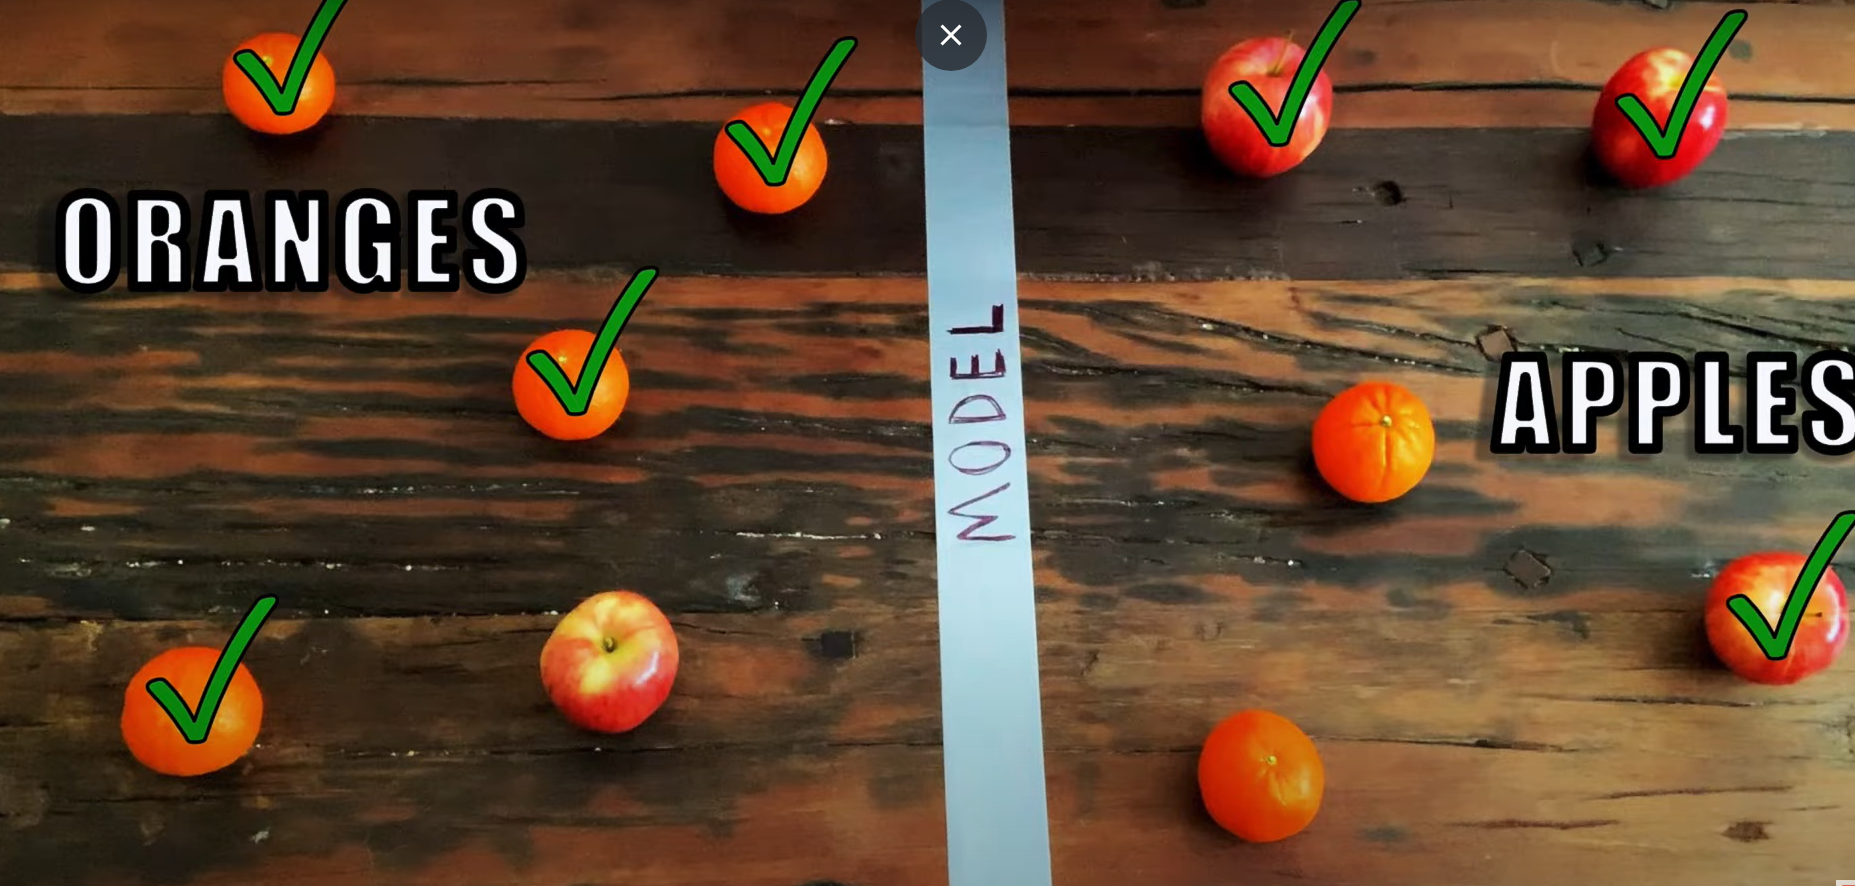


In [42]:
accuracy 
Precision
Recall(sensitivity)( tp/tp+fn)
Specificity(tn/tn+fp)
F1 score
AUC ROC curve

SyntaxError: invalid syntax (3403607427.py, line 5)

In [43]:
REF : https://www.youtube.com/watch?v=8nm0G-1uJzA

SyntaxError: invalid decimal literal (1629946703.py, line 1)

In [44]:
CLASS IMBALANCE HANDLING : UP SAMPLING , DOWN SAMPLING
Ways to reduce imbalance :


Undersampling(on majority class) — Deleting samples from the majority class.

Oversampling (minority class)— Duplicating samples from the minority class

https://editor.analyticsvidhya.com/uploads/95268oversample.JPG



SyntaxError: invalid character '—' (U+2014) (208565315.py, line 5)

In [45]:
https://miro.medium.com/max/1100/1*yH2SM0DIUQlEiveK42NnBg.webp

#only for first category:
# tp : cell1
# fn : cell2+cell3
# fp :cell4 +cell7
# tn : 5+6+8+9

 cell1    cell2    cell3
    
 cell4    cell5    cell6

 cell7    cell8    cell9
    
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
    
#https://editor.analyticsvidhya.com/uploads/812455.jpg

SyntaxError: invalid syntax (819095103.py, line 1)

In [46]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(x_test)

In [47]:
y_pred_prob

array([[0.43214242, 0.56785758],
       [0.87199753, 0.12800247],
       [0.65872822, 0.34127178],
       [0.64237387, 0.35762613],
       [0.73046097, 0.26953903],
       [0.34530492, 0.65469508],
       [0.83114735, 0.16885265],
       [0.84421794, 0.15578206],
       [0.13476795, 0.86523205],
       [0.52781118, 0.47218882],
       [0.69191129, 0.30808871],
       [0.2188736 , 0.7811264 ],
       [0.63812682, 0.36187318],
       [0.72043533, 0.27956467],
       [0.22756907, 0.77243093],
       [0.7518522 , 0.2481478 ],
       [0.49362786, 0.50637214],
       [0.51358411, 0.48641589],
       [0.72651099, 0.27348901],
       [0.941263  , 0.058737  ],
       [0.79528818, 0.20471182],
       [0.44501326, 0.55498674],
       [0.50308854, 0.49691146],
       [0.95423402, 0.04576598],
       [0.70776409, 0.29223591],
       [0.83402911, 0.16597089],
       [0.19113602, 0.80886398],
       [0.81157254, 0.18842746],
       [0.50501778, 0.49498222],
       [0.83870326, 0.16129674],
       [0.

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score 
roc_auc_score(y_test,y_pred_prob[:,1])




0.828132906054984

In [ ]:
import matplotlib.pyplot as plt

In [53]:
fpr, tpr, thr = roc_curve(y_test,y_pred_prob[:,1]) 

In [ ]:
plt.plot(fpr,tpr,marker='.',)